# **Actividad 1: Comparación de FFT**

**Universidad Nacional de Colombia - Sede Manizales**  
**Procesamiento Digital de Señales**

---

- **Presentado por:**  
  Javier Leonardo Guzmán Olaya  
  *Cód. 1108998026*


La actividad realizada consiste en generar dos señales senoidales distintas, ambas con diferentes tasas de muestreo, una vez generadas ambas señales se procede a calcular la trasformada de Fourier de cada una y se realiza su respectiva comparación.

## Generación de señales

- Se crean dos señales senoidales con frecuencias y duraciones específicas.
- Las señales tienen tasas de muestreo distintas, lo que implica una resolución temporal diferente en cada caso.

In [ ]:
# Se importan las librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

- Se genera la señal con una tasa de muestro alta:

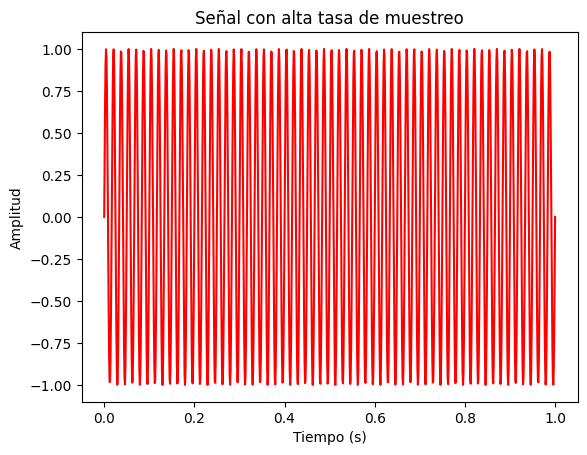

In [35]:
# Se crea la señal #1 con un sample rate mayor a 1 segundo

# Parámetros de la señal
f_1=1000 # Frecuencia de muestreo alta
t= np.linspace(0,1,f_1) # Tase de muestro
f=60 # 60 Hz
# Se crea la señal senoidal 
sin_1=np.sin(2*np.pi*f*t) 

# Se gráfica la señal con tasa de muestro alta
plt.title("Señal con alta tasa de muestreo")
plt.plot(t,sin_1,color='r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

- Se genera la señal con una tasa de muestro baja:

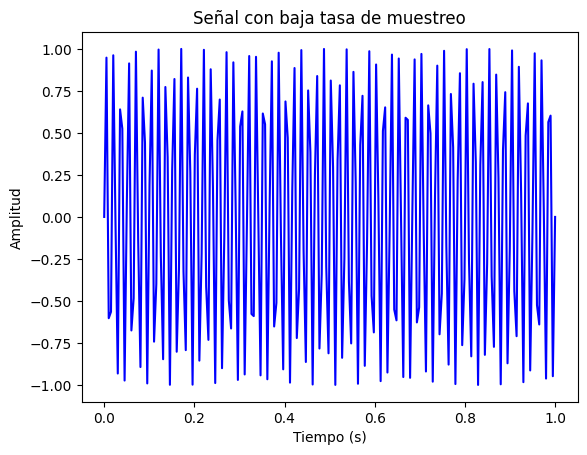

In [39]:
# Se crea la señal #1 con un sample rate menor a 1 segundo

# Parámetros de la señal
f_2=200 # Frecuencia de muestreo baja
t_2= np.linspace(0,1,f_2) # Tase de muestro
f=60 # 60 Hz
# Se crea la señal senoidal 
sin_2=np.sin(2*np.pi*f*t_2) 

# Se gráfica la señal tasa de muestro baja
plt.title("Señal con baja tasa de muestreo")
plt.plot(t_2,sin_2,color='b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

- Se realiza la comparación de ambas señales:

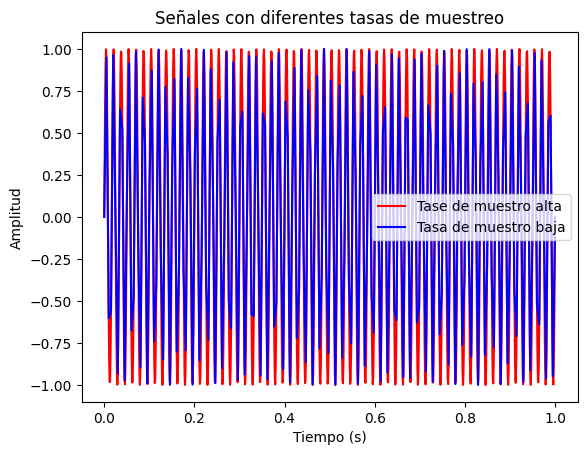

In [40]:
# Se realiza el gráfico de ambas señales

plt.title("Señales con diferentes tasas de muestreo")
plt.plot(t,sin_1,color='r',label='Tase de muestro alta')
plt.plot(t_2,sin_2,color='b', label='Tasa de muestro baja')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

## Transformada de Fourier (FFT)

- Se calcula la Transformada Rápida de Fourier (FFT) para cada señal, lo que permite analizar su contenido en frecuencia.
- Este paso convierte las señales del dominio del tiempo al dominio de la frecuencia, permitiendo identificar las componentes espectrales principales.

- Se realiza el calculo y visualización de la FFT para ambas señales:

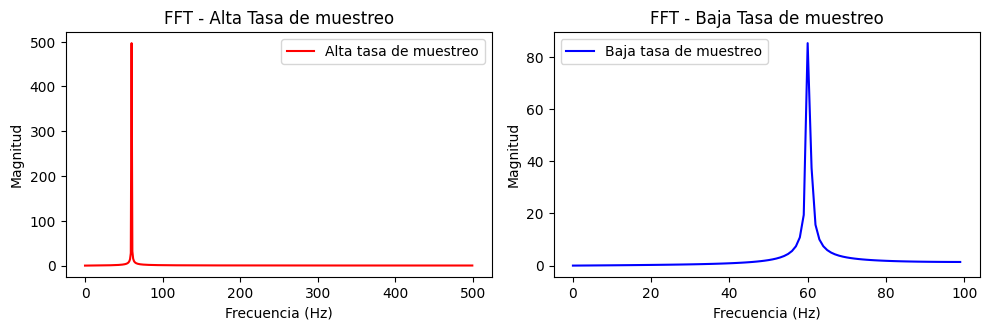

In [41]:
from scipy.fft import fft, fftfreq
# Se realiza el calculo de la FFT para la señal con alta tasa de muestreo
sin_1_fft= fft(sin_1)
freq_1= fftfreq(len(t), 1 / f_1)

# Se realiza el calculo de la FFT para la señal con baja tasa de muestreo
sin_2_fft= fft(sin_2)
freq_2= fftfreq(len(t_2), 1 / f_2) 


# Se realiza el gráfico de ambos cálculos de FFT
plt.figure(figsize=(10, 6))

# Gráfico de FFT para señal con alta tasa de muestreo
plt.subplot(2,2,1)
plt.title("FFT - Alta Tasa de muestreo")
plt.plot(freq_1[:len(freq_1)//2],np.abs(sin_1_fft[:len(sin_1_fft)//2]),color='r',label='Alta tasa de muestreo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()

# Gráfico de FFT para señal con baja tasa de muestreo
plt.subplot(2,2,2)
plt.title("FFT - Baja Tasa de muestreo")
plt.plot(freq_2[:len(freq_2)//2],np.abs(sin_2_fft[:len(sin_2_fft)//2]),color='b',label='Baja tasa de muestreo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()


plt.tight_layout()
plt.show()


Al observar ambos gráficos podemos concluir lo siguiente:

- Para el caso de la señal con alta tasa de muestro (1000 Hz), se puede observar que el espectro es preciso con respecto a su frecuencia fundamental (60 Hz), esto debido a que al tener una mayor cantidad de muestras permite una mejor resolución en este caso en el dominio de la frecuencia.

- En el caso de la señal con baja tasa de muestreo (200 Hz), no sucede lo descrito anteriormente, ya que, para esta señal la precision con respecto a su frecuencia fundamental (60 Hz) es menos detallada, esto se debe a la menor cantidad de puntos en el dominio del tiempo, lo cual reduce la resolución en el espectro.

- Como conclusion final podemos decir que: la densidad de frecuencias es mayor, para una alta tasa de muestreo.


**Teorema de Nyquist**

Con respecto a lo que nos dice el teorema de Nyquist ($f_{s}\gt 2f_{max}$) Donde:
 - $f_{s}$: Es la tasa de muestreo.
 - $f_{max}$: Es la frecuencia más alta en la señal.

Si aplicamos este teorema para cada señal obtendremos lo siguiente:
- Alta tasa de muestreo:
    $1000\gt 2\times 60 Hz$
- Baja tasa de muestreo: 
    $200\gt 2\times 60 Hz$

Se puede observar que para ambos caso se cumple el teorema de Nyquist, por lo tanto, podemos concluir, que cumplir con Nyquist es necesario, pero no siempre suficiente para obtener una buena calidad de resolución el dominio de la frecuencia.



